# **Lab 1: Basic Sampling and Linear Regression**

CS 412

***This is an individual lab, i.e., NOT for group work.***

This is your first lab. You will see how to do multinomial sampling efficiently and how to do linear regression. You will also learn how to make real-valued predictions using a linear regression model. In particular, we will help you to get started with these algorithms _step by step_.

***Deadline:***
**23:59, Wednesday of Week 3**.


## <font color='red'> Please refer to `Lab_Guideline.pdf` in the same Google Drive folder as this Jupyter notebook; the rules there apply to all the labs.</font>



# Problem 1: Basic Sampling **(24 points)** 

Say that we cast a die and want to know what the chance is of seeing a 1 rather than another digit. If the die is fair, all the six outcomes $\{1, \ldots, 6\}$ are equally likely to occur, and thus we would see a $1$ in one out of six cases. Formally we state that $1$ occurs with probability $\frac{1}{6}$.

For a real die that we receive from a factory, we might not know those proportions and we would need to check whether it is tainted. The only way to investigate the die is by casting it many times and recording the outcomes. For each cast of the die, we will observe a value in $\{1, \ldots, 6\}$. Given these outcomes, we want to investigate the probability of observing each outcome.

One natural approach for each value is to take the
individual count for that value and to divide it by the total number of tosses.
This gives us an *estimate* of the probability of a given *event*. The *law of
large numbers* tell us that as the number of tosses grows this estimate will draw closer and closer to the true underlying probability. Before going into the details of what is going here, let us try it out.

To start, let us import the necessary packages.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

## 1.1 Basic Sampling for multinomial distribution (7 points) 

Next, we will want to be able to cast the die. In statistics we call this process of drawing examples from probability distributions *sampling*.
The distribution that assigns probabilities to a number of discrete choices is called the *multinomial distribution*. We will give a more formal definition of
*distribution* later, but at a high level, think of it as just an assignment of
probabilities to events.

Given a vector of probabilities (e.g., $p=(p_1, \ldots, p_6) =$ (0.05, 0.1, 0.15, 0.2, 0.25, 0.25)), `np.random.multinomial`($n,p$) will simulate the cast for $n$ times independently, and it returns a $k$-dimensional vector, whose $i$-th entry encodes count of outcome $i$ ($i \in \{1,2,\ldots,k\}$). In this example, $k=6$.  Based on it, we can compute the fraction of occurrences for each of the $k$ outcomes.

In the code below, make sure that you do not hard code $k$ into 6.  Leave it as a variable that can be readily read from the dimensionality of the input argument.


In [2]:
def estimate(p, nSample):
  """
  Estimate the value of p by drawing samples with varying number of cast
  Input:
    - p:    a 1-D numpy array of size k (number of events), 
            encoding the probability of each of the k outcomes
    - nSample: a 1-D numpy array of size m specifying the sample sizes.
            Effectively, we run m number of experiments,
            with each experiment drawing nSample[j] number of samples (j=0,...,m-1)
  Outputs:
    - ProbEst: an m-by-k matrix (2-D numpy array), 
                whose j-th row (j >= 0) encodes the probability estimate 
                for the k events based on nSample[j] number of samples
  """  

  np.random.seed(1)
  k = p.size
  m = nSample.size
  ProbEst = np.empty([m, k], dtype=float)
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  i = 0
  for n in nSample:
    ProbEst[i] = np.random.multinomial(n, p)/n
    i+= 1
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return ProbEst

"""
Unit test case below
You should get the following results:
[[0.         0.2        0.         0.2        0.4        0.2       ]
 [0.         0.05       0.15       0.2        0.3        0.3       ]
 [0.03333333 0.13333333 0.1        0.3        0.33333333 0.1       ]]
"""
p = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.25])
nSample = np.arange(10, 40, 10)
ProbEst = estimate(p, nSample)
print(ProbEst)

[[0.         0.2        0.         0.2        0.4        0.2       ]
 [0.         0.05       0.15       0.2        0.3        0.3       ]
 [0.03333333 0.13333333 0.1        0.3        0.33333333 0.1       ]]


## 1.2  Plot the estimates (7 points)

Now use `matplotlib.pyplot.plot` to plot a figure whose horizontal $x$-axis is the number of samples drawn ($n$), and $n$ increments from 10 to 1000 at the step size of 10.  The plot has 6 curves in six different colors, each corresponding to the estimation of $p_i$ ($y$-axis) based on the $n$ casts.  A good plot should

1. Properly label the two axes by meaningful text.
2. Properly label the [ticks](https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm) of the two axes.  This includes the decision of the range of their values.  Most time, you can leave it automatically set by Python.  But if it does not look good, you can manually set it. 
3. Properly set the range of the $y$-axis.  That for the $x$-axis is given.
4. Provide legend. If the location that Python automatically chooses clouds some important parts of the plot, then manually set the legend location.

Although it is not required for this lab, a figure often needs to be included in a paper or report.  In such cases, you should also pay attention to the line width, line style (which can help distinguish curves when color information is lost in black-white printing), font size of the legend, axis label, and tick labels.

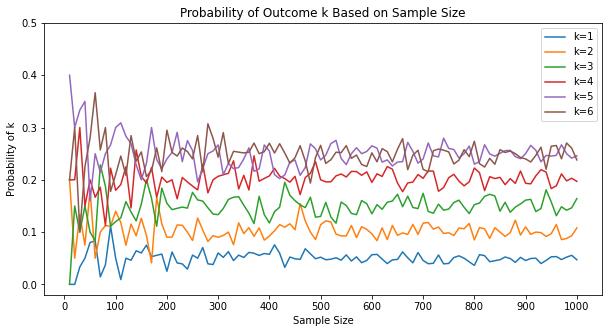

In [3]:
# Since this question is on plotting, no auto-grading can be done.
# Your answer will be graded manually based on the part between
#     *****START OF YOUR CODE  and   *****END OF YOUR CODE

p = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.25])

nSample = np.arange(10, 1000+1, 10)  # think why we add 1 to 1000?

ProbEst = estimate(p, nSample) # Call the estimate function you just wrote

plt.figure(figsize=(10, 5))

# Plot using the ProbEst matrix
# Hint: it suffices to call plt.plot just once (no penalty if you call it multiple times)
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# create plot
plt.plot(nSample,ProbEst)
# change axes ticks
plt.xticks(np.arange(0, 1001, 100))
plt.yticks(np.arange(0.0, .51, .1))
# add title and labels
plt.title('Probability of Outcome k Based on Sample Size')
plt.ylabel("Probability of k")
plt.xlabel("Sample Size")
# add legend
plt.gca().legend(('k=1','k=2', 'k=3', 'k=4', 'k=5', 'k=6'))
plt.show()
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


## 1.3 Efficient sampling (10 points) 

The experiment in the previous sub-question needs to call `np.random.multinomial`($n$,$p$) many times.  This is not efficient.  Fortunately, this function provides a third argument that allows one to repeat the $n$-cast for $s$ times. np.random.multinomial($n, p, s$) returns an $s$-by-$n$ matrix, where each row is as before, but different rows represent different experiments.  See the manual of the multinomial function [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html).

Now redo the task in Section 1.1, but now you are only allowed to call np.random.multinomial **once**. The function you will write takes two input parameters `nSample_start` and `nSample_end`. **The latter is required to be a multiple of the former**.  So in the sense of section 1.1, the  function you will implement below will be equivalent to calling the *estimate* function (from Section 1.1) as follows:

    nSample = np.arange(nSample_start, nSample_end+1, nSample_start)
    estimate(p, nSample)

**Hint**: You may find the function `numpy.cumsum` useful. Also decide on the  value of $s$ carefully.

In [4]:

def estimate_efficient(p, nSample_start, nSample_end):
  """
  Estimate the value of p by drawing samples with varying number of nSample
  This function will call np.random.multinomial only once.

  Input:
  - p: a 1-D numpy array of size k (number of events), 
            encoding the probability of each of the k outcomes
  - nSample_start: an integer specifying the starting/minimum number of samples
  - nSample_end: an integer specifying the ending/maximum number of samples (inclusive)
    We require that nSample_end must be a multiple of nSample_start

  In the sense of section 1.1, the estimate function there will equivalently call
    nSample = np.arange(nSample_start, nSample_end+1, nSample_start)
    estimate(p, nSample)

  Outputs:
  - ProbEst: an m-by-k matrix (2-D numpy array), where m = nSample_end/nSample_start.
              The j-th (j >= 0) row encodes the probability estimate 
                for the k events based on nSample_start*(j+1) number of samples
  """

  assert(nSample_end % nSample_start == 0)

  np.random.seed(1)

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  k = p.size
  m = int(nSample_end / nSample_start)

  # define empty ProbEst matrix
  ProbEst = np.empty([m, k], dtype=float)
  
  # create matrix of cumulative outcomes
  cum_outcomes = np.cumsum(np.random.multinomial(nSample_start, p, m), axis = 0)
  
  i = nSample_start

  for n in range(m):
    ProbEst[n] = cum_outcomes[n]/i
    i += nSample_start
    
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return ProbEst

"""
Unit test case below.
You should get the following results:
[[0.         0.2        0.         0.2        0.4        0.2       ]
 [0.         0.1        0.05       0.2        0.35       0.3       ]
 [0.         0.1        0.06666667 0.26666667 0.36666667 0.2       ]]
"""

p = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.25])
probEst_eff = estimate_efficient(p, 10, 30)
print(probEst_eff)


[[0.         0.2        0.         0.2        0.4        0.2       ]
 [0.         0.1        0.05       0.2        0.35       0.3       ]
 [0.         0.1        0.06666667 0.26666667 0.36666667 0.2       ]]


## 1.4 Plot the result from Efficient sampling (0 points) 

Now use `matplotlib.pyplot.plot` to plot the result from **efficient** sampling using *estimate_efficient*. 

Everything will be exactly the same as in Section 1.2, except that `estimate` is replaced by `estimate_efficient`.  So there is no point associated with this question.  It is only meant for yourself to appreciate the result.

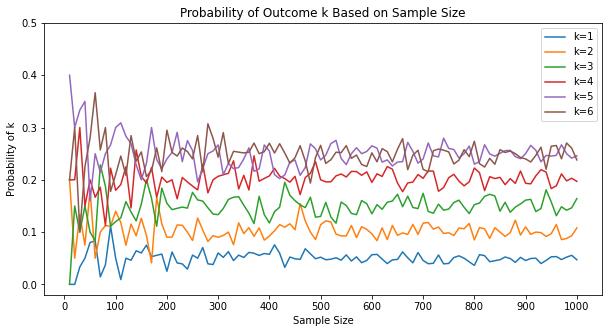

In [5]:
p = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.25])
ProbEst_eff = estimate_efficient(p, 10, 1000) 

plt.figure(figsize=(10, 5))

# Copy your code from Section 1.2 to plot using the ProbEst_eff matrix
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
nSample = np.arange(10,1001,10)
plt.plot(nSample,ProbEst)
# change axis ticks
plt.xticks(np.arange(0, 1001, 100))
plt.yticks(np.arange(0.0, .51, .1))
# add title and labels
plt.title('Probability of Outcome k Based on Sample Size')
plt.ylabel("Probability of k")
plt.xlabel("Sample Size")
# add legend
plt.gca().legend(('k=1','k=2', 'k=3', 'k=4', 'k=5', 'k=6'))
plt.show()


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



# Problem 2: Linear regression **(76 points)** 

In this section, we will explore linear regression models.  The dataset we will use for this section is Wine Qualuty, whose description can be found [here](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). This dataset contains **4898** examples, each containing **11** features (the first 11 columns), and the **last** (12-th) column is the value we want to predict. The dataset can be downloaded here [`winequality-white.csv`](https://www.cs.uic.edu/~zhangx/teaching/winequality-white.csv) (our code will download it directly). 

Different from classification models, a regression model is used to predict real values rather than the category an example belongs to. Linear regression is a linear approach to modeling the relationship between features and real value target. To perform supervised learning, we represent the hypothesis as a linear function of features ($x$) to predict the output ($y$).

\begin{equation}
f(x) = \theta_0 + \theta_1x_1 + ... + \theta_nx_n    \tag{8}
\end{equation}

Here $\theta_i$'s are the **parameters** parameterizing the space of linear functions mapping from $\mathcal{X}$ to $\mathcal{Y}$. Our goal is to **learn** these parameters so that we can find a linear function in this hypothesis space to estimate the output $y$.

To simplify the notation and ease the computation, we **pad** the input $x$ by letting $x_0=1$. That is, for an example with three features $x=[x_1, x_2, x_3]^\top$, the padded feature vector will be $x=[1,x_1, x_2, x_3]^\top$. Then, the linear function can be written as:

\begin{equation}
f_\theta(x) = \sum_{j=0}^n \theta_j x_j = \theta^\top x    \tag{9}
\end{equation}
where on the right-hand side above we are viewing $\theta := [\theta_0, \theta_1, \ldots, \theta_n]^\top$ and $x$ both as vectors, and here $n = 11$ is the number of features. 

Given a training set, the way to learn these parameters is to make $f_\theta(x)$ close to $y$. To measure the closeness, we use Mean-Squared-Error (MSE) here. The loss function can therefore be defined as:

\begin{equation}
L(\theta) = \frac{1}{2m}\sum_{i=1}^m(f_\theta(x^{(i)})-y^{(i)})^2 = \frac{1}{2m}\sum_{i=1}^m(\theta^\top x^{(i)}-y^{(i)})^2,  \tag{10}
\end{equation}
where the superscript $(i)$ denotes the $i$-th example, 
and $m$ is the total number of training samples. To learn the parameter $\theta$, our goal is to **minimize** the above loss function. In this lab, we will explore two different methods to learn the parameter: 

1. Gradient descent
2. Closed-form solution (root of the gradient)

## 2.1 Data preprocessing **(12 points)**

Once we have received the dataset, we first need to preprocess it.  Very often, the features in a dataset are of very different scale, which can slow down the optimization for Eq (10). To accelerate it, we need to normalize each feature by substracting its mean value, and then dividing by its standard deviation (std). Assuming $X_i = [x_i^{(1)}, ... , x_i^{(m)}]^\top$ is the $i$-th feature in the training set (across the $m$ examples), the normalized feature $i$ for the $j$-th training example can be computed by:
\begin{equation}
\hat{x}^j_i = \frac{x^j_i - m_i}{s_i},
\text{ where } m_i = mean(X_i), \text{ and } s_i = std(X_i).
  \tag{11}
\end{equation}

**Step 1: normalize the training set (6 points)** {-}

In the following code block, implement a function `featureNormalization`. The input is the training set. The output is the normalized training set, along with the mean and std of each features. You will need the mean and std to apply to the test set later.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def featureNormalization(X):
  """
  Normalize each feature for the input set
  Input:
  - X: a 2-D numpy array of shape (num_train, num_features)
  Outputs:
  - X_normalized: a 2-D numpy array of shape (num_train, num_features)
  - X_mean: a 1-D numpy array of length (num_features)
  - X_std: a 1-D numpy array of length (num_features)
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  X_mean = X.mean(0)
  X_std = X.std(0)
  X_normalized = (X - X_mean) / X_std
  
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  
  return X_normalized, X_mean, X_std

"""
 Unit test case below.
 Should print
[[ 0.49109521 -0.40242644 -0.92156595 -0.1052653 ]
 [ 0.90298151  1.37532553  1.3897809   1.27398003]
 [-1.39407672 -0.97289909 -0.46821496 -1.16871473]]
[0.99 3.12 4.47 4.51]
[0.63124216 2.26128282 1.34553583 3.70492465]
"""
X = np.array([[1.30,2.21,3.23,4.12], [1.56, 6.23, 6.34, 9.23], [0.11, 0.92, 3.84, 0.18]])
X_normalized, X_mean, X_std = featureNormalization(X)
print(X_normalized)
print(X_mean)
print(X_std)

[[ 0.49109521 -0.40242644 -0.92156595 -0.1052653 ]
 [ 0.90298151  1.37532553  1.3897809   1.27398003]
 [-1.39407672 -0.97289909 -0.46821496 -1.16871473]]
[0.99 3.12 4.47 4.51]
[0.63124216 2.26128282 1.34553583 3.70492465]


**Step 2: normalize the test set (6 points)** {-}

The above normalization function will be used for the training set. At test time, we will need to normalize the test data in the same way. However, we shouldn't compute new mean and std from the test set itself, because it may be inconsistent with the training data.  Instead, we will apply the mean $m_i$ and std $s_i$ computed from the training set.  Given a text example $[x_1, \ldots, x_m]^\top$, we just transform $x_i$ into $(x_i - m_i)/s_i$,
where $m_i$ and $s_i$ are computed from the training data as in the *where* clause of Eq (11).

In the following code block, implement a function `applyNormalization`, which normalizes the test set for each feature using the provided mean and std.

In [7]:
def applyNormalization(X, X_mean, X_std):
  """
  Normalize each feature for the input set X
  Input:
  - X: a 2-D numpy array of shape (num_test, num_features)
  - X_mean: a 1-D numpy array of length (num_features)
  - X_std: a 1-D numpy array of length (num_features)

  Output:
  - X_normalized: a 2-D numpy array of shape (num_test, num_features)  
  """

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  X_normalized = (X - X_mean) / X_std 
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return X_normalized

"""
  Unit test case
  Should print
  [[ 3.00e-01  1.21e+00  6.15e-01  4.02e+01]
   [ 5.60e-01  5.23e+00  2.17e+00  9.13e+01]
   [-8.90e-01 -8.00e-02  9.20e-01  8.00e-01]]
"""
X =  np.array([[1.30,2.21,3.23,4.12], [1.56, 6.23, 6.34, 9.23], 
               [0.11, 0.92, 3.84, 0.18]])
X_mean = np.array([1.0, 1.0, 2.0, 0.1])
X_std = np.array([1.0, 1.0, 2.0, 0.1])
X_normalized = applyNormalization(X, X_mean, X_std)
print(X_normalized)


[[ 3.00e-01  1.21e+00  6.15e-01  4.02e+01]
 [ 5.60e-01  5.23e+00  2.17e+00  9.13e+01]
 [-8.90e-01 -8.00e-02  9.20e-01  8.00e-01]]


##2.2 Gradient Descent **(28 points)**{-}

In this section, you will need to implement the gradient descent algorithm that trains the linear regression model. Some introductions to gradient descent can be found [here](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

**Step 1: implement the loss function (6 points)** {-} 

As introduced at the begining of this problem, we will use MSE to measure the loss. In the following code block, implement a function `computeMSE`. Follow Equation (10), and the function should compute the MSE for the input set with the given $\theta$.

In [8]:
def computeMSE(X, y, theta):
  """
  Compute MSE for the input set (X,y) with theta
  Inputs:
  - X: a 2-D numpy array of shape (num_samples, num_features+1)
  - y: a 1-D numpy array of length (num_samples)
  - theta: a 1-D numpy array of length (num_features+1)
  Output:
  - error: MSE, a real number
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  m = len(X)
  error = sum(((np.dot(X, np.transpose(theta))-y)**2))/(m*2)
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  
  return error

"""
  Unit test case:
  Should print 73.0
"""
X = np.array([[2.0, 1.0, 3.0], [3.0, 6.0, 2.0]])
y =  np.array([1.0, 1.0])
theta = np.array([1.0, 2.0,1.0])
error = computeMSE(X, y, theta)
print(error)


73.0


**Step 2: compute the gradient of the loss function (14 points)** {-} 

Recall that our goal is to find the parameter $\theta$ that can minimize the loss $L(\theta)$. To find the $\theta$ with gradient descent method, we start from some initial $\theta$, and then repeatedly perform the update:
\begin{equation}
\theta = \theta - \alpha\nabla_{\theta}L(\theta).    \tag{12}
\end{equation}

Here $\alpha > 0$ is a step size, a.k.a., learning rate.
To enable this update rule, we first need to compute the gardient in $\theta$. 

1. Derive the gradient of $\theta$ from Eq (10), and 
<font color='red'> type the result in the following line:</font>

$$
\nabla_{\theta}L(\theta) = \frac{X^{T}(X\theta)}{m} - \frac{X^{T}y}{m}
$$

Note for computational efficiency, your expression is not allowed to have $\sum_{i=1}^m$, and cannot have any multiplication of two matrices.  Multiplications of a matrix and a vector is allowed. Here is a hint.  Let $a_i$ and $b_i$ be vectors.  Then
$$
  \sum_i (\theta^\top b_i) a_i = \sum_i a_i (b_i^\top \theta) = \left(\sum_i a_i b_i^\top \right) \theta = (A B^\top) \theta = A (B^\top \theta),
$$
where $A = [a_1, ..., a_m]$ and $B = [b_1, ..., b_m]$.

2. Then, implement a function `computeGradient` to compute the gradient $\nabla_{\theta}L(\theta)$ by following the expression you just derived above.

In [9]:
def computeGradient(X, y, theta):
  """
  Compute the gradient of theta
  Inputs:
  - X: A 2-D numpy array of shape (num_train, num_features+1)
  - y: A 1-D numpy array of length (num_train)
  - theta: A 1-D numpy array of length (num_features+1)
  Output:
  - gradient: A 1-D numpy array of length (num_features+1)
  """

  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  m = len(X)
  gradient = (np.dot(np.transpose(X), np.dot(X,theta)) / m) - ((np.dot(np.transpose(X), y)) / m)
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

  return gradient

""" 
  Unit test case:
  Should return
  [30. 51. 25.]
""" 
X = np.array([[2.0, 1.0, 3.0], [3.0, 6.0, 2.0]])
y =  np.array([1.0, 1.0])
theta = np.array([1.0, 2.0,1.0])
gradient = computeGradient(X, y, theta)
print(gradient)


[30. 51. 25.]


**Step 3: implement the gradient descent algorithm (8 points)** {-} 

Now we can use the update rule in Equation (12) to find the $\theta$ that minimizes $L(\theta)$. We start from some initial $\theta_0$, then repeatedly take a step in the direction of steepest decrease of $L$. The $\alpha$ in Equation (12) indicates how large the step we want to take at every update. We repeat the updates for a certain number of iterations, and the last updated $\theta$ will be the $\theta$ we find.
In the following code block, implement a function `gradientDescent`, which updates $\theta$ for `num_iters` times and records the loss value (MSE) at every iteration.

In [10]:
def gradientDescent(X, y, theta, alpha, num_iters):
  """
  Update theta using equation (12) for num_iters times.
  Input: 
  - X: a numpy array of shape (num_train, num_features+1)
  - y: a numpy array of shape (num_train, 1)
  - theta: a 1-D numpy array of length (num_features+1)
  - alpha: learning rate, a scalar
  - num_iters: an integer specifying how many steps to run the gradient descent
  Outputs:
  - theta: the final theta, a 1-D numpy array of length (num_features+1). 
           You can directly overwrite the theta in the input argument, and return it.
  - Loss_record: a 1-D numpy array of length (num_iters), 
          recording the loss value of Eq (10) at every iteration, 
  """
  # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  m = len(X)
  Loss_record = np.zeros(num_iters)
  for i in range(num_iters):
    theta = theta - (alpha*(((np.dot( np.dot(theta, np.transpose(X)), X))/m) - ((np.dot(np.transpose(X), y))/m)))
    Loss_record[i] = sum(((np.dot(X, np.transpose(theta))-y)**2))/(m*2) 
  
  # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return theta, Loss_record

"""
  Unit test case:
  Should return
  [[0.3322825 0.858839 0.446925 ]]
  [37.5778     19.36559064 10.00046345]
"""
X = np.array([[2.0, 1.0, 3.0], [3.0, 6.0, 2.0]])
y =  np.array([1.0, 1.0])
theta = np.array([1.0, 2.0, 1.0])
alpha = 0.01
num_iters = 3
theta, Loss_record = gradientDescent(X, y, theta, alpha, num_iters)
print(theta)
print(Loss_record)

[0.3322825 0.858839  0.446925 ]
[37.5778     19.36559064 10.00046345]


## 2.3 Train the linear regression model with gradient descent **(14 points)**{-}

Now we are ready to chain all the above functions together to perform the linear regression training on the Wine Quality dataset. 

**Step 1: load the data (not for grading)**

The last column of the resulting "data" variable is the label.  Read the first row of the downloaded winequality-white.csv for more descriptions of the columns.

In [11]:
# First load the data (this code block is not for grading)

import urllib.request
import shutil

url = 'https://www.cs.uic.edu/~zhangx/teaching/winequality-white.csv'
file_name = 'winequality-white.csv'
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

data = np.genfromtxt(file_name, delimiter=";", skip_header=1)


**Step 2: training and testing (14 points)**

After loading the dataset, split the dataset into training and test sets. Please split the first **4000** samples as training set and the rest as test set. Then perform the following:

*   Normalize training set features
*   Pad the normalized training features by a constant 1, as the new first feature
*   Initialize $\theta$ as a zero vector
*   Update $\theta$ using gradient descent (`num_iters` and `alpha` are provided)
*   **Plot** a figure where $x$-axis is the number of iterations, $y$-axis is the loss value (MSE).
*   Apply normalization to test set features, pad the features
*   Compute the test error (MSE) and **print** out the test error

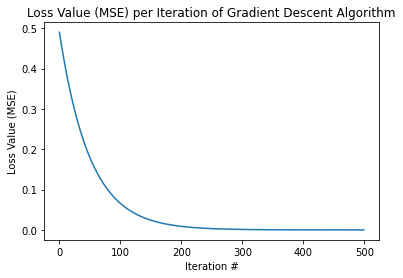

2.1585623705578372e-05


In [12]:
num_train = 4000
alpha = 0.01
num_iters = 500

# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# split dataset
train_data = data[:num_train]
test_data = data[num_train +1:]

# Normalize, pad training set
# Normalize with featureNormalization function
train_data_normalized, train_data_mean, train_data_std = featureNormalization(train_data)

#pad training set
#concatenate ones to beginning of array
train_data_normalized = np.concatenate((np.ones((num_train,1)), train_data_normalized), axis=1)

# define y, num_features, & initialize theta
y = np.array(np.ones(num_train))
num_features = np.shape(train_data)[1]
theta = np.array(np.zeros(num_features+1))

#calculate gradient
theta, Loss_record = gradientDescent(train_data_normalized, y, theta, alpha, num_iters)

#Plot iteration by MSE
plt.plot(Loss_record)

# add title and labels
plt.title('Loss Value (MSE) per Iteration of Gradient Descent Algorithm')
plt.ylabel("Loss Value (MSE)")
plt.xlabel("Iteration #")
plt.show()

#Apply Normalization to test data
test_data_normalized = applyNormalization(test_data, train_data_mean, train_data_std)

#Pad test data
test_data_normalized = np.concatenate((np.ones((len(test_data),1)), test_data_normalized), axis=1)

#Compute and print test error
#recompute y
num_test = len(test_data_normalized)
y = np.array(np.ones(num_test))
#compute MSE
test_error = computeMSE(test_data_normalized, y, theta)
#print
print(test_error)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

## 2.4 Effect of different learning rate (8 points) {-}

To investigate the effect of learning rate, repeat the learning process (gradient descent) with different learning rate in $[1.0, 0.1, 0.01, 0.001]$. 
**Plot** 4 figures corresponding to different learning rates, where the $x$-axis is the number of iterations, 
and the $y$-axis is the loss value (MSE). **Print** the test error (MSE) respectively in the format "test MSE for using learning rate __ is __" (four lines in total).

/var/folders/pt/hywr0yrn551b1dd11xs97j5r0000gp/T/ipykernel_41142/2356179347.py:21: RuntimeWarning: overflow encountered in double_scalars
  Loss_record[i] = sum(((np.dot(X, np.transpose(theta))-y)**2))/(m*2)
/var/folders/pt/hywr0yrn551b1dd11xs97j5r0000gp/T/ipykernel_41142/2356179347.py:21: RuntimeWarning: overflow encountered in square
  Loss_record[i] = sum(((np.dot(X, np.transpose(theta))-y)**2))/(m*2)


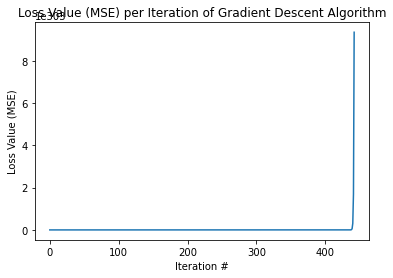

/var/folders/pt/hywr0yrn551b1dd11xs97j5r0000gp/T/ipykernel_41142/3212509036.py:13: RuntimeWarning: overflow encountered in square
  error = sum(((np.dot(X, np.transpose(theta))-y)**2))/(m*2)


test MSE for using learning rate 1.0 is inf


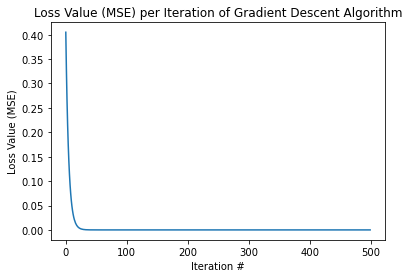

test MSE for using learning rate 0.1 is 1.2233727486005391e-27


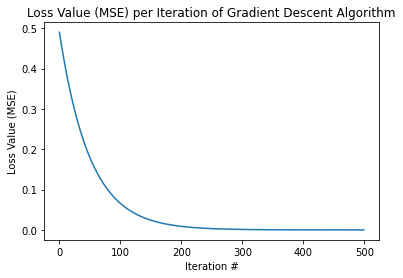

test MSE for using learning rate 0.01 is 2.1585623705578372e-05


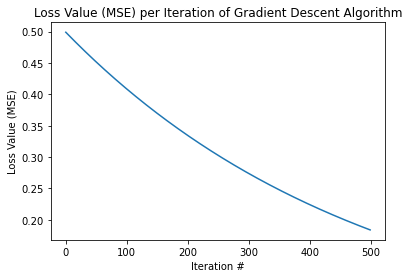

test MSE for using learning rate 0.001 is 0.18384771238555858


In [13]:
learning_rates = [1.0, 0.1, 0.01, 0.001]
Loss_record = np.zeros((len(learning_rates), num_iters))
test_error = np.zeros(len(learning_rates))

# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
for i in range(len(learning_rates)):
    #repeat learning process for learning_rates
    
    # define y, num_features, & initialize theta
    alpha = learning_rates[i]
    y = np.array(np.ones(num_train))
    num_features = np.shape(train_data)[1]
    theta = np.array(np.zeros(num_features+1)) 
    
    #calculate gradient
    theta, Loss_record = gradientDescent(train_data_normalized, y, theta, alpha, num_iters)

    #Plot iteration by MSE
    plt.plot(Loss_record)

    # add title and labels
    plt.title('Loss Value (MSE) per Iteration of Gradient Descent Algorithm')
    plt.ylabel("Loss Value (MSE)")
    plt.xlabel("Iteration #")
    plt.show()

    #Apply Normalization to test data
    test_data_normalized = applyNormalization(test_data, train_data_mean, train_data_std)

    #Pad test data
    test_data_normalized = np.concatenate((np.ones((len(test_data),1)), test_data_normalized), axis=1)

    #Compute and print test error
    #recompute y
    num_test = len(test_data_normalized)
    y = np.array(np.ones(num_test))
    #compute MSE
    test_error[i] = computeMSE(test_data_normalized, y, theta)

    #print test error
    print("test MSE for using learning rate", learning_rates[i],  "is",  test_error[i])

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

## 2.5 Closed-form solution **(14 points)** {-}


Gradient descent minimizes $L$ by updating $\theta$ iteratively. There is another way to find the $\theta$ explicitly. Indeed, by finding the root of the gradient $\nabla_\theta L(\theta)$ (i.e., the $\theta$ such that $\nabla_\theta L(\theta) = 0$), we can obtain a closed-form solution of $\theta$ that minimizes the loss $L$.

**Step 1: find the root of the gradient to obtain the closed-form solution of $\theta$  (10 points)**

<font color='red'> Type your result in the following lines:</font>

$$
\nabla_{\theta}L(\theta) = 0 \quad \Rightarrow \quad \theta = (X^{T}X)^{-1}X^{T}y
$$


Then, implement a function `closeForm` to compute the closed-form solution of $\theta$ using the expression you have derived above. 

In [14]:
def closeForm(X, y):
  """
  Compute close form solution for theta
  Inputs:
  - X: a numpy array of shape (num_train, num_features+1)
  - y: a 1-D numpy array of length (num_train)
  Output:
  - theta: a 1-D numpy array of length (num_features+1)
  """
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)) ,y)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  return theta

"""
  Unit test case:
  Should return
  [ 0.76470588 -0.17647059 -0.11764706]
"""
X = np.array([[2.0, 1.0, 3.0], [3.0, 6.0, 2.0], [-1, 0, 2.0]])
y = np.array([1.0, 1.0, -1.0])
theta = closeForm(X, y)
print(theta)

[ 0.76470588 -0.17647059 -0.11764706]


**Step 2: evaluate the test error using closed-form solution (4 points)** {-} 

Compute a new $\theta$ using the closed-form solution. Evaluate the new $\theta$ on test set by **printing** the test error (MSE) in the format: "test MSE using close form solution is : __".

In [15]:
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
test_error = computeMSE(X,y,theta)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

print('test MSE using close form solution is : ', test_error)


test MSE using close form solution is :  4.1086505480261033e-32


# Submission Instruction {-}

You're almost done! Take the following steps to finally submit your work.

1. After executing all commands and completing this notebook, save your `Lab_1.ipynb` as a PDF file, named as `X_Y_UIN.pdf`, where `X` is your first name, `Y` is your last name, and `UIN` is your UIN. Make sure that your PDF file includes all parts of your solution, including the plots. 

> * Print out all unit test case results before printing the notebook into a PDF.
* If you use Colab, open this notebook in Chrome.  Then File -> Print -> set Destination to "Save as PDF".  If the web page freezes when printing, close Chrome and reopen the page. If Chrome doesn't work, try Firefox.
* If you are working on your own computer, we recommend using the browser (not jupyter) for saving the PDF. For Chrome on a Mac, this is under *File->Print...->Open PDF in Preview*. When the PDF opens in Preview, you can use *Save...* to save it.
* Sometimes, a figure that appears near the end of a page can get cut.  In this case, try to add some new lines in the preceding code block so that the figure is pushed to the beginning of the next page. Or insert some text blocks.

2. Upload `X_Y_UIN.pdf` to Gradescope under `Lab_1_Written`.

3. A template of `Lab_1.py` has been provided.  For all functions in `Lab_1.py`, copy the corresponding code snippets you have written into it, excluding the plot code.  **Do NOT** copy any code of plotting figures and do not import **matplotlib**.  This is because the auto-grader cannot work with plotting.  **Do NOT** change the function names.  

4. Zip `Lab_1.py` and `Lab_1.ipynb` (**2 files**) into a zip file named `X_Y_UIN.zip`. Suppose the two files are in the folder `Lab_1`.  Then zip up the **two files inside the `Lab_1` folder**.  **Do NOT zip up the folder `Lab_1`** because the auto-grader cannot search inside a folder. Submit this zip file to Gradescope under `Lab_1_Code`. 

5. The autograder on Gradscope will be open all the time. We designed some simple test cases to help you check wehther your functions are executable. You will see the results of running autograder once you submit your code. Please follow the error messages to debug. Since those simple test cases are designed for debugging, it does not guaranttee your solution will work well on the real dataset. It is your responsibility to make your code logically correct. Since all functions are tested in batch, the autograder might take a few minutes to run after submission.  Also note that some questions are not covered by the auto-grader, and so the total score you see from the auto-grader is not 100.

6. Sections 1.1 and 1.3 involve random functions, which makes auto-grading very difficult.  We are using the following code to tolerate small difference between your function's result and the reference result:

    `self.assertIsNone(np.testing.assert_almost_equal(your_res, ref_res, decimal=2))`

    So if the auto-test fails, try to add something like np.random.seed(x) (x = 1, 2, ...) in your function implementation, so that randomness luckily attains an error below 2 decimal points.  If it keeps failing and you are really confident, then ignore it and we will check your code manually anyway.



<font color='red'> **If you only try to get real-time feedback from auto-grader, it will be fine to just upload** `Lab_1.py` to `Lab_1_Code`</font>.  However, the final submission for grading should still follow the above point 4.

You can submit to Gradescope as often as you like. We will only consider your last submission before the deadline.